In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df = pd.read_csv('train.csv',index_col='Date',parse_dates=True)

In [3]:
df.tail()

,Weekly_Sales
Date,
2012-09-28,1109.88
2012-10-05,3418.45
2012-10-12,4404.74
2012-10-19,374.94
2012-10-26,261.21


<AxesSubplot:xlabel='Date'>

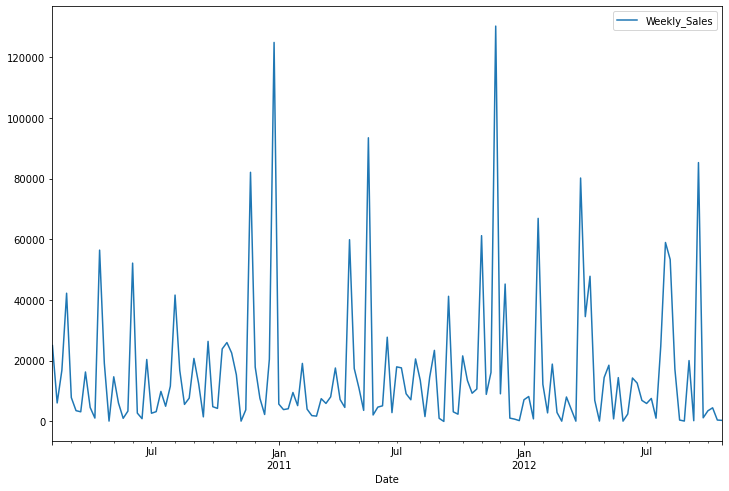

In [4]:
df.columns = ['Weekly_Sales']
df.plot(figsize=(12,8))

In [5]:
df['Sale_LastMonth']=df['Weekly_Sales'].shift(+1)
df['Sale_2Monthsback']=df['Weekly_Sales'].shift(+2)
df['Sale_3Monthsback']=df['Weekly_Sales'].shift(+3)
df

,Weekly_Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Date,,,,
2010-02-05,24924.50,NaN,NaN,NaN
2010-02-12,6008.22,24924.50,NaN,NaN
2010-02-19,16803.77,6008.22,24924.50,NaN
2010-02-26,42200.12,16803.77,6008.22,24924.50
2010-03-05,7785.75,42200.12,16803.77,6008.22
...,...,...,...,...
2012-09-28,1109.88,85288.14,150.50,19984.08
2012-10-05,3418.45,1109.88,85288.14,150.50
2012-10-12,4404.74,3418.45,1109.88,85288.14


In [6]:
df=df.dropna()
df

,Weekly_Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Date,,,,
2010-02-26,42200.12,16803.77,6008.22,24924.50
2010-03-05,7785.75,42200.12,16803.77,6008.22
2010-03-12,3469.06,7785.75,42200.12,16803.77
2010-03-19,3088.88,3469.06,7785.75,42200.12
2010-03-26,16219.96,3088.88,3469.06,7785.75
...,...,...,...,...
2012-09-28,1109.88,85288.14,150.50,19984.08
2012-10-05,3418.45,1109.88,85288.14,150.50
2012-10-12,4404.74,3418.45,1109.88,85288.14


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [18]:
import pickle

In [21]:
pickle.dump(model,open("RfRegressor",'wb'))

In [24]:
model1 = pickle.load(open("RfRegressor",'rb'))

In [9]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Weekly_Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 1.6803770e+04  6.0082200e+03  2.4924500e+04]
 [ 4.2200120e+04  1.6803770e+04  6.0082200e+03]
 [ 7.7857500e+03  4.2200120e+04  1.6803770e+04]
 [ 3.4690600e+03  7.7857500e+03  4.2200120e+04]
 [ 3.0888800e+03  3.4690600e+03  7.7857500e+03]
 [ 1.6219960e+04  3.0888800e+03  3.4690600e+03]
 [ 4.5088500e+03  1.6219960e+04  3.0888800e+03]
 [ 1.0232100e+03  4.5088500e+03  1.6219960e+04]
 [ 5.6416660e+04  1.0232100e+03  4.5088500e+03]
 [ 1.9129430e+04  5.6416660e+04  1.0232100e+03]
 [ 2.3940000e+01  1.9129430e+04  5.6416660e+04]
 [ 1.4634780e+04  2.3940000e+01  1.9129430e+04]
 [ 5.9922300e+03  1.4634780e+04  2.3940000e+01]
 [ 9.3847000e+02  5.9922300e+03  1.4634780e+04]
 [ 3.3205900e+03  9.3847000e+02  5.9922300e+03]
 [ 5.2128990e+04  3.3205900e+03  9.3847000e+02]
 [ 2.6620000e+03  5.2128990e+04  3.3205900e+03]
 [ 8.2000000e+02  2.6620000e+03  5.2128990e+04]
 [ 2.0346090e+04  8.2000000e+02  2.6620000e+03]
 [ 2.6130200e+03  2.0346090e+04  8.2000000e+02]
 [ 3.1373900e+03  2.6130200e+03  2.03460

In [10]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [12]:
model.fit(X_train,y_train)

C:\Users\sudha\AppData\Local\Temp\ipykernel_2652\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(max_features=3, random_state=1)

In [12]:
train_pred = model.predict(X_train)

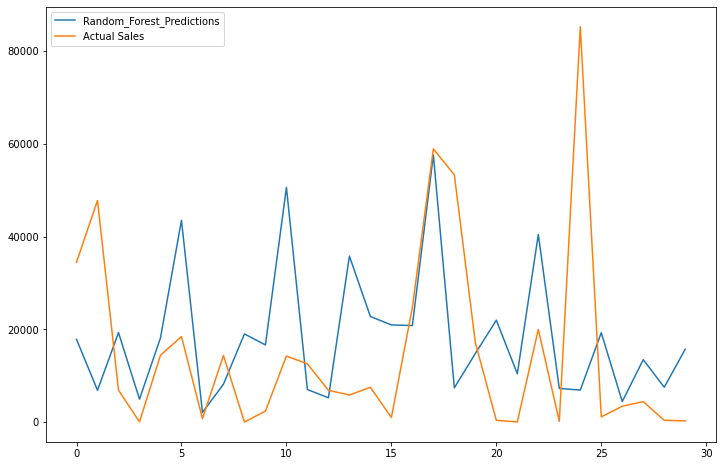

In [13]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

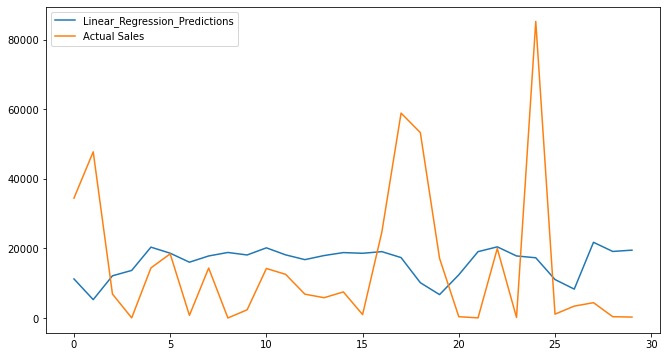

In [14]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [15]:
test_lr = lin_model.predict(X_test)
train_lr = lin_model.predict(X_train)

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [17]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 23300.65463856365
Mean Squared Error for Linear Regression Model is: 21997.43981329894
